# Behavioral Cloning Project

## The goal/steps of this project are the following
1. Use the simulator to collect data of good driving behavior
2. Build a convolutional Nerual Network in Keras that predicts steering angles from images
3. Train and validata the model with a training and validation set
4. Test and validate the model with a training and validation set
5. Test that the model successfully drives around track one without leaving the road
6. Summarize the results with a written report

## Rubric Points
Here I will consider the rubric points individually and describe how I address each point in my implementation.

### Files submiited & code Quality

#### 1.Submission includes all required files as following.
1.model.py containing the script to create and train the model.
2.drive.py for driving the car in autonomous mode, not changed.
3.model.h5 containing a trained convolution neural network.
4.writeup_report summarizing the results
5.run1.mp4 where I recorded the vedio for the autonomous mode driving by the model trained.

#### 2.submission includes functional code using the udacity provided simulator and my drive.py.file, the car can be driven autonomously around the track by executing

python drive.py model.h5

#### 3.submission code is usable and readable
The model.py file contains the code for training and saving the convolution neural network.The file shows the pipeline I used for training and validating the model, and it contains comments to explain how the code works.

### Model Architecture and Training Strategy
#### 1. An appropriate model architectue has been employed
My model consists of five convolution neural network layers( code line 88-100), one flatten layer (code line 102) and three fully connected layers( code line 105-115). For all the CNN, the activation functions are the RELU function considering the gradient vanishment problem, and the former three CNN are also using the subsample. For the former two FCN, I also use the Dropout layer to overcome the overfitting problem.

This model has been tested on the simulator and enable the vehicle to drive itself staying on the track properly.

#### 2. Attempts to reduce overfitting in the model
I am useing the dropout layers for reducing the overfitting (code line 107&112).
Also, I tried to get more dataset to train the network.
Next trial will be using the regulation item.

#### 3. Model parameter tuning
The model was using an adam optimizer, so the learning rate was not tuned manually(code line 118). But there are still some parameters needed to be tuned, since I am using the left and right cameras so the correction needed to be tuned (now it's 0.12). More parameters are the cropped size, top:50 bottom:20 left and right:0.

#### 4. Appropriate training data
The training data consists of around 6 laps center lane driving + recovering from the lefe and right sides of the road.

For more details about how I created the appropriate data ,see the below.

### Model Architecture and Training Strategy 
#### 1. solution design approach
The overall strategy for deriving a model architecture was to use similar model by Nvidia. Their model is proven to work hence a good model to try with.

My first step was to use a few layers of convolution neural networks, followed with fully connected layers. I think this model is appropriate because the cnns removes position dependency in which it makes stronger assumptions by locality assumption. After that, the cnn depth's layer is flattened. Then fully connected layers are reducing size down to 1 will give steering value from regression. Each fully connected layers are also followed with relu activation except the last one because we are interested in the regression value instead of classification.

To combat the overfitting, I modified the model so that it has some dropout layers and normalize the training set.

The final step was to run the simulator to see how well the car was driving around track one. Initially the car come out of the track especially on the bridges. To provide better training data, i use mouse or joystick to reduce steering input's resolution.

After sufficient laps were recorded, the vehicle is able to drive autonomously around the track without leaving the road.

#### 2. Final Model Architecture
The final model architecture (model.py 84 - 115) consisted of five convolution neural network, one flatten layer and three fully connected layers where the former two has the drouout layer followed.

The overall architecture is as following:
* Convolution Neural Network layer 1, filter(24,5,5),activation function = 'relu'
* Convolution neural network layer 2, filter(36,5,5),activation function = 'relu'
* Convolution neural network layer 3, filter(48,5,5),activation function = 'relu'
* Convolution neural network layer 4, filter(64,3,3),activation function = 'relu'
* Convolution neural network layer 5, filter(128,3,3),activation function ='relu'
* Flatten layer
* Dense(50),activation function = 'relu'
* Dropout(0.2)
* Dense(10),activation function = 'relu'
* Dropout(0.2)
* Dense(1)

#### 3. Creation of the training set & training process
In order to reduce the influence from the sky and tree in the images, I used the crop method provided by Keras.

To capture good driving behavior, I first recorded around 6 laps on track one using center lane driving and record the three camera images (left, center and right), here is an example image for the center lane driving.
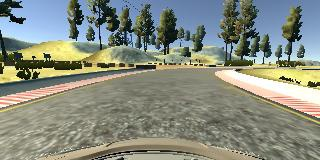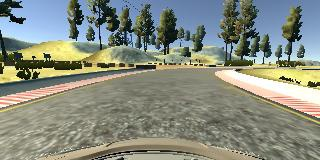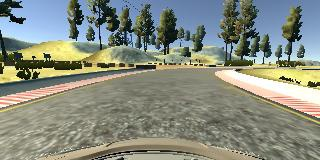

I then recorded the vehicle recovering from the left side and right sides if the road back to center so that the vehicle would learn to drive back when it's off the track. These images show what a recovery looks like.
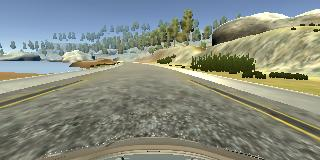
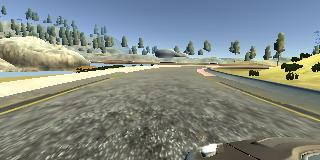

To augment the dataset, I also flipped images and angles thinking that this would increase the data set and generalize the model. For example here is an image that has then been flipped:
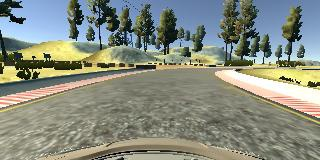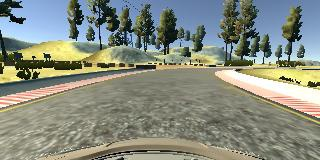

After the collection process, I had 31,215 number of data Points. I then preprocessed this data by NVIDIA GEFORCE GTX 960M with around 10 minutes on my PC.

I finally randomlly shuffled the data set and put 20% of the dat into a validation set.

I used this training data for training the model, The validation set helped determine if the model was over of under fitting. The ideal number of epochs was 10.
